In [95]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [96]:
df=pd.read_csv('UKdataFinal.csv')

In [97]:
df.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [98]:
df.shape

(370951, 10)

In [99]:
df=df.drop('Unnamed: 0',axis=1)

In [100]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [101]:
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
TotalPrice     0
dtype: int64

In [102]:
df = df[(df['Quantity']>0)]

In [103]:
df = df.rename(columns={'Customer ID': 'CustomerID'})

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370951 entries, 0 to 370950
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      370951 non-null  int64  
 1   StockCode    370951 non-null  object 
 2   Description  370951 non-null  object 
 3   Quantity     370951 non-null  int64  
 4   InvoiceDate  370951 non-null  object 
 5   Price        370951 non-null  float64
 6   CustomerID   370951 non-null  float64
 7   Country      370951 non-null  object 
 8   TotalPrice   370951 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 25.5+ MB


In [105]:
df.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0


In [106]:
df.shape

(370951, 9)

In [107]:
df.set_index("CustomerID",inplace=True)

In [108]:
df.reset_index(inplace=True)

In [109]:
from lifetimes.plotting import *
from lifetimes.utils import *
#from lifetimes.estimation import *

data = summary_data_from_transaction_data(df, 'CustomerID', 'InvoiceDate', monetary_value_col='TotalPrice', observation_period_end='2010-12-9')
data.head()

,frequency,recency,T,monetary_value
CustomerID,,,,
12346.0,6.0,196.0,360.0,47.143333
12608.0,0.0,0.0,39.0,0.000000
12745.0,1.0,88.0,209.0,266.930000
12746.0,0.0,0.0,175.0,0.000000
12747.0,15.0,363.0,367.0,313.325333


In [110]:
sample_set_df=pd.read_csv('sample_set_df.csv')

In [111]:
sample_set_df.shape

(3971, 18)

In [112]:
sample_set_df.head()

,Unnamed: 0,CustomerID,sales_avg_M_1,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_1,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_1,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CLV_LR
0,0,12346.0,0.000,0.00,142.310,23.410000,22.7,0.0,0.0,1.0,5.0,5.0,0.00,0.00,142.31,117.05,113.5,33.896364
1,1,12608.0,415.790,0.00,0.000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,415.79,0.00,0.00,0.00,0.0,415.790000
2,2,12745.0,0.000,266.93,456.920,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.00,266.93,456.92,0.00,0.0,361.925000
3,3,12746.0,0.000,0.00,254.550,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.00,254.55,0.00,0.0,254.550000
4,4,12747.0,450.265,314.84,286.725,156.963333,344.0,4.0,2.0,4.0,3.0,3.0,1801.06,629.68,1146.90,470.89,1032.0,317.533125


In [113]:
sample_set_df=sample_set_df.drop('Unnamed: 0', axis=1)

In [114]:
sample_set_df.rename(columns={'Customer ID': 'CustomerID'}, inplace=True)

In [115]:
sample_set_df.rename(columns={'sales_sum_M_1': 'CLV_GBM'}, inplace=True)

In [116]:
sample_set_df.set_index('CustomerID', inplace=True)

In [117]:
sample_set_df=sample_set_df.drop('CLV_LR', axis=1)

In [118]:
sample_set_df=sample_set_df.drop('sales_count_M_1', axis=1)

In [119]:
sample_set_df=sample_set_df.drop('sales_avg_M_1', axis=1)

In [120]:
#sample_set_df=sample_set_df.drop('sales_sum_M_1', axis=1)

In [121]:
sample_set_df.head(2)

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,CLV_GBM,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,,
12346.0,0.0,142.31,23.41,22.7,0.0,1.0,5.0,5.0,0.00,0.0,142.31,117.05,113.5
12608.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,415.79,0.0,0.00,0.00,0.0


In [122]:
sample_set_df=sample_set_df.merge(data, on='CustomerID', how='inner')

In [123]:
sample_set_df.head(2)

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,CLV_GBM,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,frequency,recency,T,monetary_value
CustomerID,,,,,,,,,,,,,,,,,
12346.0,0.0,142.31,23.41,22.7,0.0,1.0,5.0,5.0,0.00,0.0,142.31,117.05,113.5,6.0,196.0,360.0,47.143333
12608.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,415.79,0.0,0.00,0.00,0.0,0.0,0.0,39.0,0.000000


In [124]:
sample_set_df.shape

(3971, 17)

In [125]:
sample_set_df.to_csv('data_for_GBM.csv')

In [126]:
data_for_GBM=sample_set_df

In [127]:
data_for_GBM.isna().sum()

sales_avg_M_2      0
sales_avg_M_3      0
sales_avg_M_4      0
sales_avg_M_5      0
sales_count_M_2    0
sales_count_M_3    0
sales_count_M_4    0
sales_count_M_5    0
CLV_GBM            0
sales_sum_M_2      0
sales_sum_M_3      0
sales_sum_M_4      0
sales_sum_M_5      0
frequency          0
recency            0
T                  0
monetary_value     0
dtype: int64

In [128]:
data_for_GBM.shape

(3971, 17)

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Set the random seed for reproducibility
np.random.seed(11)

# Define the feature variables and the target variable
X = data_for_GBM.drop('CLV_GBM', axis=1)
y = data_for_GBM['CLV_GBM']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# Initialize the Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=11)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Output the mean squared error
print('Mean Squared Error:', mse)

# Predict the target variable for all customers
all_predictions = model.predict(X)

# Add the predictions to the original dataframe
data_for_GBM['predicted_CLV_GBM'] = all_predictions

# Show the head of the dataframe with predictions
print(data_for_GBM.head())

Mean Squared Error: 408802.5497716268
            sales_avg_M_2  sales_avg_M_3  sales_avg_M_4  sales_avg_M_5  \
CustomerID                                                               
12346.0              0.00        142.310      23.410000           22.7   
12608.0              0.00          0.000       0.000000            0.0   
12745.0            266.93        456.920       0.000000            0.0   
12746.0              0.00        254.550       0.000000            0.0   
12747.0            314.84        286.725     156.963333          344.0   

            sales_count_M_2  sales_count_M_3  sales_count_M_4  \
CustomerID                                                      
12346.0                 0.0              1.0              5.0   
12608.0                 0.0              0.0              0.0   
12745.0                 1.0              1.0              0.0   
12746.0                 0.0              1.0              0.0   
12747.0                 2.0              4.0         

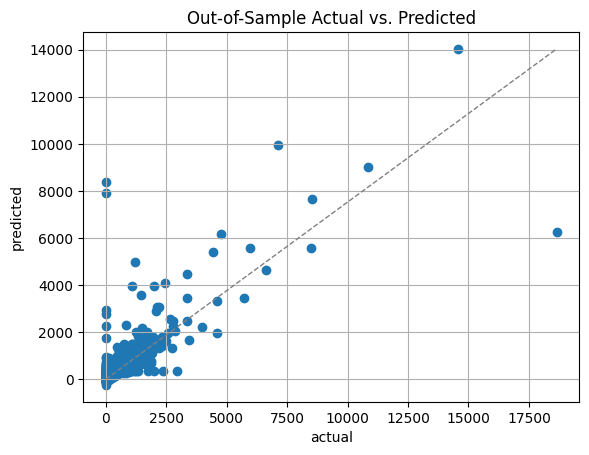

In [130]:
test_preds = model.predict(X_test)

plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()

plt.show()

In [131]:
all_predictions

array([187.21304236, 336.56084902, 122.9473654 , ...,   3.57144174,
       638.75249665, 478.36371502])

In [132]:
data_for_GBM.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,CLV_GBM,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,frequency,recency,T,monetary_value,predicted_CLV_GBM
CustomerID,,,,,,,,,,,,,,,,,,
12346.0,0.00,142.310,23.410000,22.7,0.0,1.0,5.0,5.0,0.00,0.00,142.31,117.05,113.5,6.0,196.0,360.0,47.143333,187.213042
12608.0,0.00,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,415.79,0.00,0.00,0.00,0.0,0.0,0.0,39.0,0.000000,336.560849
12745.0,266.93,456.920,0.000000,0.0,1.0,1.0,0.0,0.0,0.00,266.93,456.92,0.00,0.0,1.0,88.0,209.0,266.930000,122.947365
12746.0,0.00,254.550,0.000000,0.0,0.0,1.0,0.0,0.0,0.00,0.00,254.55,0.00,0.0,0.0,0.0,175.0,0.000000,44.268926
12747.0,314.84,286.725,156.963333,344.0,2.0,4.0,3.0,3.0,1801.06,629.68,1146.90,470.89,1032.0,15.0,363.0,367.0,313.325333,1332.900576


In [133]:
data_for_GBM.shape

(3971, 18)

In [134]:
from sklearn.metrics import r2_score

# Calculate R2 score for train set
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

# Calculate R2 score for test set
r2_test = r2_score(y_test, y_pred)

# Output the R2 scores
print('R2 score for training set:', r2_train)
print('R2 score for testing set:', r2_test)

R2 score for training set: 0.9777860833332326
R2 score for testing set: 0.638200512718581


In [135]:
#data_for_GBM.to_csv('data_from_GBM.csv')

In [136]:
u=data_for_GBM

In [137]:
u.reset_index(inplace=True)

In [138]:
data_from_GBM=u[['CustomerID','predicted_CLV_GBM']]

In [139]:
data_from_GBM.head(2)

,CustomerID,predicted_CLV_GBM
0,12346.0,187.213042
1,12608.0,336.560849


In [140]:
data_from_GBM.to_csv('data_from_GBM.csv')